# Welter issue #6
## Trim off the blue side and NaN's
### Part 1- Make a list.

Michael Gully-Santiago  
Thursday, December 17, 2015  

Let's do it.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Read in the data

In [3]:
import h5py

In [4]:
f = h5py.File("../data/reduced/LkCa4_IGRINS_K.hdf5", "r")
K = {key:np.array(f[key]) for key in f.keys()}
f.close()

f = h5py.File("../data/reduced/LkCa4_IGRINS_H.hdf5", "r")
H = {key:np.array(f[key]) for key in f.keys()}
f.close()

## Plot it

We will trim between pixel 450 and 1950.

(0.0, 1.2)

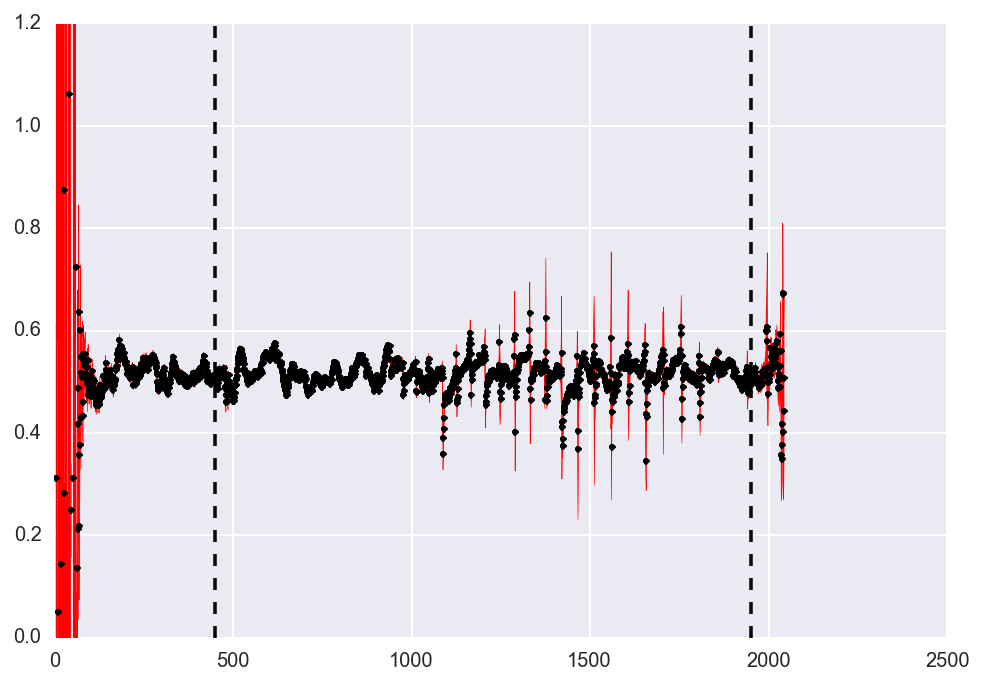

In [77]:
o=16
fls_out = K['fls'][o,:]
sig_out = K['sigmas'][o,:]
wls_out = K['wls'][o,:]
sig = sig_out

pix = np.arange(2048)
plt.plot(pix, fls_out, 'k.')

plt.fill_between(pix, fls_out-sig, fls_out+sig, color='r')

plt.vlines(450, 0, 2, linestyles='--')
plt.vlines(1950, 0, 2, linestyles='--')
plt.ylim(0.0, 1.2)

## H band

In [81]:
lft = 450
rgt = 1950

for o in range(28):
    m = o + 98
    out_name = '../data/reduced/LkCa4_IGRINS_m{:03d}.hdf5'.format(m)
    fls_out = H['fls'][o,lft:rgt]
    sig_out = H['sigmas'][o,lft:rgt]
    wls_out = H['wls'][o,lft:rgt]
    msk_out = np.ones(len(wls_out), dtype=int)
    f_new = h5py.File(out_name, 'w')
    f_new.create_dataset('fls', data=fls_out)
    f_new.create_dataset('wls', data=wls_out)
    f_new.create_dataset('sigmas', data=sig_out)
    f_new.create_dataset('masks', data=msk_out)
    print("{:03d}: {:.0f}  -  {:.0f}   {}".format(o, wls_out[0], wls_out[-1], out_name))
    f_new.close()

000: 18154  -  18335   ../data/reduced/LkCa4_IGRINS_m098.hdf5
001: 17975  -  18155   ../data/reduced/LkCa4_IGRINS_m099.hdf5
002: 17800  -  17978   ../data/reduced/LkCa4_IGRINS_m100.hdf5
003: 17628  -  17805   ../data/reduced/LkCa4_IGRINS_m101.hdf5
004: 17460  -  17635   ../data/reduced/LkCa4_IGRINS_m102.hdf5
005: 17295  -  17468   ../data/reduced/LkCa4_IGRINS_m103.hdf5
006: 17133  -  17305   ../data/reduced/LkCa4_IGRINS_m104.hdf5
007: 16975  -  17145   ../data/reduced/LkCa4_IGRINS_m105.hdf5
008: 16819  -  16988   ../data/reduced/LkCa4_IGRINS_m106.hdf5
009: 16667  -  16834   ../data/reduced/LkCa4_IGRINS_m107.hdf5
010: 16517  -  16682   ../data/reduced/LkCa4_IGRINS_m108.hdf5
011: 16370  -  16534   ../data/reduced/LkCa4_IGRINS_m109.hdf5
012: 16226  -  16388   ../data/reduced/LkCa4_IGRINS_m110.hdf5
013: 16084  -  16245   ../data/reduced/LkCa4_IGRINS_m111.hdf5
014: 15946  -  16105   ../data/reduced/LkCa4_IGRINS_m112.hdf5
015: 15809  -  15967   ../data/reduced/LkCa4_IGRINS_m113.hdf5
016: 156

## K-band

In [82]:
lft = 450
rgt = 1950

for o in range(26):
    m = o + 71
    out_name = '../data/reduced/LkCa4_IGRINS_m{:03d}.hdf5'.format(m)
    fls_out = K['fls'][o,lft:rgt]
    sig_out = K['sigmas'][o,lft:rgt]
    wls_out = K['wls'][o,lft:rgt]
    msk_out = np.ones(len(wls_out), dtype=int)
    f_new = h5py.File(out_name, 'w')
    f_new.create_dataset('fls', data=fls_out)
    f_new.create_dataset('wls', data=wls_out)
    f_new.create_dataset('sigmas', data=sig_out)
    f_new.create_dataset('masks', data=msk_out)
    print("{:03d}: {:.0f}  -  {:.0f}   {}".format(o, wls_out[0], wls_out[-1], out_name))
    f_new.close()

000: 24927  -  25171   ../data/reduced/LkCa4_IGRINS_m071.hdf5
001: 24585  -  24827   ../data/reduced/LkCa4_IGRINS_m072.hdf5
002: 24253  -  24491   ../data/reduced/LkCa4_IGRINS_m073.hdf5
003: 23929  -  24165   ../data/reduced/LkCa4_IGRINS_m074.hdf5
004: 23615  -  23848   ../data/reduced/LkCa4_IGRINS_m075.hdf5
005: 23308  -  23539   ../data/reduced/LkCa4_IGRINS_m076.hdf5
006: 23010  -  23238   ../data/reduced/LkCa4_IGRINS_m077.hdf5
007: 22719  -  22945   ../data/reduced/LkCa4_IGRINS_m078.hdf5
008: 22436  -  22659   ../data/reduced/LkCa4_IGRINS_m079.hdf5
009: 22160  -  22380   ../data/reduced/LkCa4_IGRINS_m080.hdf5
010: 21891  -  22109   ../data/reduced/LkCa4_IGRINS_m081.hdf5
011: 21629  -  21844   ../data/reduced/LkCa4_IGRINS_m082.hdf5
012: 21373  -  21585   ../data/reduced/LkCa4_IGRINS_m083.hdf5
013: 21123  -  21333   ../data/reduced/LkCa4_IGRINS_m084.hdf5
014: 20879  -  21086   ../data/reduced/LkCa4_IGRINS_m085.hdf5
015: 20641  -  20846   ../data/reduced/LkCa4_IGRINS_m086.hdf5
016: 204